<a href="https://colab.research.google.com/github/Aashay7/tf_Play/blob/master/Keras_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import keras
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import math

from google.colab import drive

Using TensorFlow backend.


In [2]:
drive.mount("/content/drive")
print(tf.__version__)
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
1.13.1
drive/  sample_data/


In [0]:
%cd drive/My\ Drive
!ls

In [6]:
%cd Deep\ Learning\ -\ Google
%cd data

/content/drive/My Drive/Deep Learning - Google
/content/drive/My Drive/Deep Learning - Google/data


In [7]:
!ls

iris.data


In [0]:
df_raw = pd.read_csv('iris.data')

In [9]:
df_raw.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [0]:
df_raw.columns= ["Sepal length","Sepal height","Petal length","Petal width","Class"]
#sepal length in cm2. sepal width in cm3. petal length in cm4. petal width in cm 

In [11]:
len(df_raw.Class)

149

In [0]:
df = df_raw.drop("Class",axis=1)

In [13]:
df.head(5)

,Sepal length,Sepal height,Petal length,Petal width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [14]:
le = LabelEncoder()
df_raw.Class = le.fit_transform(df_raw.Class)
df_raw.loc[0:0]

,Sepal length,Sepal height,Petal length,Petal width,Class
0,4.9,3.0,1.4,0.2,0


In [40]:
df_raw.Class.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[4]),
    tf.keras.layers.Dense(units=4),
    tf.keras.layers.Dense(units=8),
    tf.keras.layers.Dense(units=16),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.Dense(units=16),
    tf.keras.layers.Dense(units=8),
    tf.keras.layers.Dense(units=4),
    tf.keras.layers.Dense(units=1)
])

In [0]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.005))

# with 0.1 ->  Minimum Loss at iteration:  379 	 With Loss Value: 0.04898338027348454
#Minimum Loss at iteration:  379 	 With Loss Value: 0.04898338027348454  0.0469553001074983
#0.046140261844500596
#Minimum Loss at iteration:  519 	 With Loss Value: 0.046140261844500596
#Minimum Loss at iteration:  860 	 With Loss Value: 0.04597363044701567
#Minimum Loss at iteration:  653 	 With Loss Value: 0.04509002812856796
#Minimum Loss at iteration:  1129 	 With Loss Value: 0.04509102848152186
#
# Make a logging function

In [0]:
history = model.fit(df,df_raw.Class,epochs=400,verbose=False)

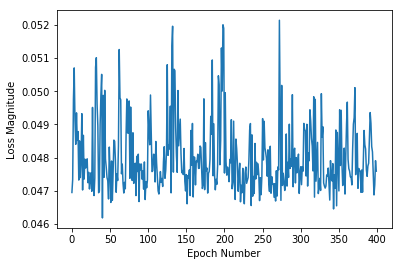

In [148]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
#print("Epoch info: ",history.epoch,"\nValues Info:",history.history,"",)


In [149]:
i = len(history.epoch)
minloss = 1
for i in range(1, len(history.epoch)):
  lossval = history.history['loss'][i]
  if minloss > lossval:
    minloss= lossval
    minlossindex = i
  print("Epoch Number :",history.epoch[i], "\tValue :",lossval)



Epoch Number : 1 	Value : 0.04733594887008603
Epoch Number : 2 	Value : 0.0497598530562132
Epoch Number : 3 	Value : 0.05070120716254983
Epoch Number : 4 	Value : 0.04912768445609
Epoch Number : 5 	Value : 0.0483984063385717
Epoch Number : 6 	Value : 0.049346068611481046
Epoch Number : 7 	Value : 0.04851492844371988
Epoch Number : 8 	Value : 0.0487822479249647
Epoch Number : 9 	Value : 0.047321051634198065
Epoch Number : 10 	Value : 0.04850255460447113
Epoch Number : 11 	Value : 0.047394412900977484
Epoch Number : 12 	Value : 0.04793209380051434
Epoch Number : 13 	Value : 0.04932262775981986
Epoch Number : 14 	Value : 0.04702182841680994
Epoch Number : 15 	Value : 0.04867026544857345
Epoch Number : 16 	Value : 0.047350735222333226
Epoch Number : 17 	Value : 0.04795040960279887
Epoch Number : 18 	Value : 0.04768553583713986
Epoch Number : 19 	Value : 0.047708897882659966
Epoch Number : 20 	Value : 0.04796052059071176
Epoch Number : 21 	Value : 0.04724152716214225
Epoch Number : 22 	Valu

In [150]:
print("Minimum Loss at iteration: ",minlossindex,"\t With Loss Value:",minloss)

Minimum Loss at iteration:  40 	 With Loss Value: 0.04617973704566092


In [145]:
min(history.history['loss'])

0.04613250041468032

In [127]:
print(model.predict(df.loc[80:80]))

[[0.9410007]]


In [0]:
model.predict(df.loc[80:80]).item(-1)

0.9091454744338989

In [0]:
pred_df_array = np.array(['Predicted Output Classes'])
print(pred_df_array)

pred_df_array_round= np.array(['Predicted Output Classes - Rounded'])
print(pred_df_array_round)
#pred_df_array_2 = np.array([1])
#print(pred_df_array_2)

#pred_df_array = np.append(pred_df_array,pred_df_array_2,axis=0)

print(pred_df_array.transpose())

['Predicted Output Classes']
['Predicted Output Classes - Rounded']
['Predicted Output Classes']


In [0]:
df_pred = pd.DataFrame(columns=['Predicted', 'Predicted_Rounded'])
#df_pred = df_pred.append({'Index':1, 'Predicted':22,'Predicted Rounded':33},ignore_index=True)
#df_pred.iloc[[1]]
#df_pred.iloc[0] = (1,1,1)
df_pred

,Predicted,Predicted_Rounded


In [0]:
for i in range(0,150):
  m = model.predict(df.loc[i:i])
  val = m.item(0)
  df_pred_2 = pd.DataFrame({'Predicted':val, 'Predicted_Rounded':round(val)},index=[i])
  #df_pred = df_pred.append({'Index':i, 'Predicted':val,'Predicted Rounded':1},ignore_index=True)
  df_pred = df_pred.append(df_pred_2)
  print(i, val)
  

In [0]:
len(df_pred)
df_pred.head(5)

,Predicted,Predicted_Rounded
0,-0.032315,0
1,-0.035684,0
2,0.023815,0
3,-0.058656,0
4,0.073937,0


In [0]:
#df_raw.head(5)
df_raw.Class

In [0]:
eval_df = pd.DataFrame(df_raw.Class)
len(eval_df)

149

In [0]:
eval_df['Predicted'] = df_pred.Predicted
eval_df['Predicted_Rounded'] = df_pred.Predicted_Rounded

In [0]:
eval_df.head(5)

,Class,Predicted,Predicted_Rounded
0,0,-0.032315,0
1,0,-0.035684,0
2,0,0.023815,0
3,0,-0.058656,0
4,0,0.073937,0


In [0]:
eval_df['Predicted'][0]

-0.03231549263000488

In [0]:
eval_df['SQE_Class_Predicted_Rounded'] = (eval_df.Predicted_Rounded - eval_df.Class)**2


In [0]:
eval_df['SQE_Class_Predicted'] = (eval_df.Predicted - eval_df.Class)**2


In [0]:
eval_df.head(4)

,Class,Predicted,Predicted_Rounded,SQE_Class_Predicted_Rounded,SQE_Class_Predicted
0,0,-0.032315,0,0,0.001044
1,0,-0.035684,0,0,0.001273
2,0,0.023815,0,0,0.000567
3,0,-0.058656,0,0,0.003441


In [0]:
sum_p=0
sum_pr=0
for i in range(0,149):
  sum_p = sum_p + eval_df['SQE_Class_Predicted'][i]
  sum_pr = sum_pr + eval_df['SQE_Class_Predicted_Rounded'][i]

In [0]:
print(sum_p,sum_pr)
len(eval_df)
mean_p = sum_p / len(eval_df)
mean_pr = sum_pr/ len(eval_df)


7.056670101323099 4


In [0]:
print(mean_p,mean_pr)

0.04736020202230268 0.026845637583892617


In [0]:
rmse_p = math.sqrt(mean_p)
rmse_pr = math.sqrt(mean_pr)

print(rmse_p, rmse_pr)

0.21762399229474372 0.16384638410380808


In [0]:
## CHECK CASES where predicted != Desired
cnt = 0
for i in range(0,149):
  if eval_df['Predicted_Rounded'][i] != eval_df['Class'][i]:
    cnt+=1
    print(i,"Desired Value",eval_df['Class'][i],"Predicted",eval_df['Predicted_Rounded'][i] )
  else:
    continue

print("Total Fail = {}".format(cnt))

69 Desired Value 1 Predicted 2
82 Desired Value 1 Predicted 2
118 Desired Value 2 Predicted 1
132 Desired Value 2 Predicted 1
Total Fail = 4


In [0]:
print(cnt)

4


In [0]:
total_fl = 4/149
print("Accuracy is ",100*(1 - total_fl),"%")

Accuracy is  97.31543624161074 %
